In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.preprocessing as preprocessing
import re
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Age')

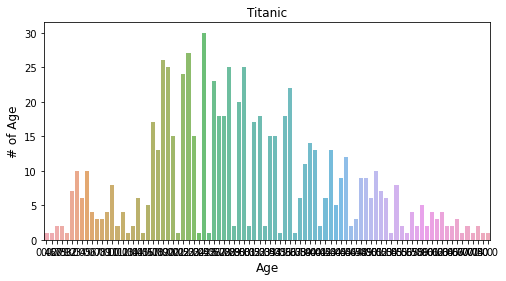

In [6]:
x=train['Age'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Titanic")
plt.ylabel('# of Age', fontsize=12)
plt.xlabel('Age',  fontsize=12)

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Embarked')

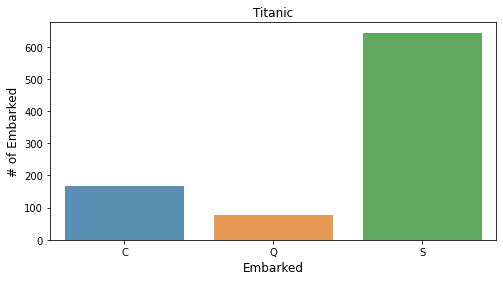

In [7]:
x=train['Embarked'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Titanic")
plt.ylabel('# of Embarked', fontsize=12)
plt.xlabel('Embarked',  fontsize=12)

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Fare')

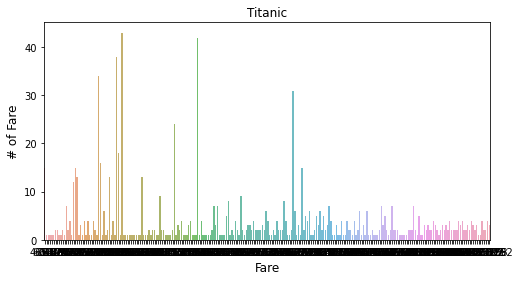

In [8]:
x=train['Fare'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Titanic")
plt.ylabel('# of Fare', fontsize=12)
plt.xlabel('Fare',  fontsize=12)

Text(0, 0.5, 'number')

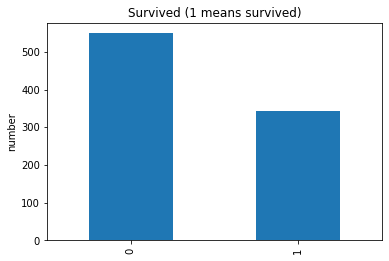

In [37]:
train.Survived.value_counts().plot(kind='bar')
plt.title(u"Survived (1 means survived)")
plt.ylabel(u"number") 

In [9]:
mean=train.groupby(['Pclass','Sex'])["Age"].aggregate("mean").reset_index()
mean

,Pclass,Sex,Age
0,1,female,34.611765
1,1,male,41.281386
2,2,female,28.722973
3,2,male,30.740707
4,3,female,21.750000
5,3,male,26.507589


In [20]:
not_null=train[train['Age'].notnull()]
not_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [33]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
age1={"Age":34.611765}
missing1 = train[(train.Pclass == 1) & (train.Sex == 'female')].fillna(value=age1)
missing1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,34.611765,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C50,C


In [88]:
age2={"Age":41.281386}
missing2 = train[(train.Pclass == 1) & (train.Sex == 'male')].fillna(value=age2)
missing2 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,41.281386,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.000000,0,0,113055,26.5500,E17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.000000,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.000000,0,0,695,5.0000,B51 B53 B55,S


In [89]:
age3={"Age":28.722973}
missing3 = train[(train.Pclass == 2) & (train.Sex == 'female')].fillna(value=age3)
missing3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [90]:
age4={"Age":30.740707}
missing4 = train[(train.Pclass == 2) & (train.Sex == 'male')].fillna(value=age4)
missing4 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.740707,0,0,244373,13.0,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.000000,0,0,239865,26.0,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.000000,0,0,C.A. 33111,10.5,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
848,849,0,2,"Harper, Rev. John",male,28.000000,0,1,248727,33.0,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.000000,0,0,233866,13.0,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5,NaN,S


In [91]:
age5={"Age":21.750000}
missing5 = train[(train.Pclass == 3) & (train.Sex == 'female')].fillna(value=age5)
missing5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.75,8,2,CA. 2343,69.5500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.00,0,0,2667,7.2250,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.1250,NaN,Q


In [92]:
age6={"Age":26.507589}
missing6 = train[(train.Pclass == 3) & (train.Sex == 'male')].fillna(value=age6)
missing6 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,26.507589,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [93]:
age7={"Age":34.611765}
missing7 = test[(test.Pclass == 1) & (test.Sex == 'female')].fillna(value=age7)
age8={"Age":41.281386}
missing8 = test[(test.Pclass == 1) & (test.Sex == 'male')].fillna(value=age8)
age9={"Age":28.722973}
missing9 = test[(test.Pclass == 2) & (test.Sex == 'female')].fillna(value=age9)
missing9
age10={"Age":30.740707}
missing10 = test[(test.Pclass == 2) & (test.Sex == 'male')].fillna(value=age10)
missing10 
age11={"Age":21.750000}
missing11 = test[(test.Pclass == 3) & (test.Sex == 'female')].fillna(value=age11)
missing11
age12={"Age":26.507589}
missing12 = test[(test.Pclass == 3) & (test.Sex == 'male')].fillna(value=age12)
missing12 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S
10,902,3,"Ilieff, Mr. Ylio",male,26.507589,0,0,349220,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.000000,0,0,21332,7.7333,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,26.507589,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,26.507589,0,0,359309,8.0500,NaN,S


In [94]:
frames=[missing7,missing8,missing9,missing10,missing11,missing12]
test_new = pd.concat(frames)
test_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.000000,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.000000,1,0,W.E.P. 5734,61.1750,E31,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,34.611765,0,0,PC 17598,31.6833,NaN,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.000000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.000000,0,1,113509,61.9792,B36,C
...,...,...,...,...,...,...,...,...,...,...,...
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.000000,0,0,21332,7.7333,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,26.507589,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,26.507589,0,0,359309,8.0500,NaN,S


In [95]:
frames=[missing1,missing2,missing3,missing4,missing5,missing6]
train_new = pd.concat(frames)
train_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,34.611765,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,26.507589,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [96]:
pick = ['Pclass', 'Age']

In [97]:
x_train = train_new[pick].values

In [98]:
y_train = train_new['Survived'].values

In [99]:
x_test = test_new[pick].values

In [100]:
model = LogisticRegression()

In [104]:
model.fit(x_train, y_train)

LogisticRegression()

In [105]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [106]:
y_predict = model.predict(x_train)

In [107]:
model.intercept_

array([3.53063477])

In [108]:
model.coef_

array([[-1.18668388, -0.04543031]])

In [109]:
(y_predict == y_train).mean()

0.6958473625140292

In [111]:
y_esti = model.predict(x_test)

In [113]:
test_new['Survived'] = y_esti

In [114]:
submit = test_new[['PassengerId', 'Survived']]